**Columns**

  - **id** the ID of the patient (n-th confirmed patient)

  - **sex** the sex of the patient

  - **birth_year** the birth year of the patient

  - **country** the country of the patient

  - **region** the region of the patient

  - **group** the collective infection

  - **infection_reason** the reason of infection

  - **infection_order** the order of infection

  - **infected_by** the ID of who has infected the patient

  - **contact_number** the number of contacts with people

  - **confirmed_date** the date of confirmation

  - **released_date** the date of discharge

  - **deceased_date** the date of decease

  - **state** isolated / released / deceased


## Import library

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## EDA

In [68]:
data = pd.read_csv('patient.csv')

In [69]:
pd.pandas.set_option('display.max_columns',None)

In [70]:
data.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,1/20/2020,2/6/2020,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,1/24/2020,2/5/2020,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,1/26/2020,2/12/2020,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,1/27/2020,2/9/2020,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,1/30/2020,3/2/2020,NaN,released


In [71]:
data.tail()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
5323,5324,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,3/3/2020,NaN,NaN,isolated
5324,5325,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,3/3/2020,NaN,NaN,isolated
5325,5326,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,3/3/2020,NaN,NaN,isolated
5326,5327,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,3/3/2020,NaN,NaN,isolated
5327,5328,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,3/3/2020,NaN,NaN,isolated


In [72]:
data.shape

(5328, 14)

In [73]:
data.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [74]:
data.isnull().sum()

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

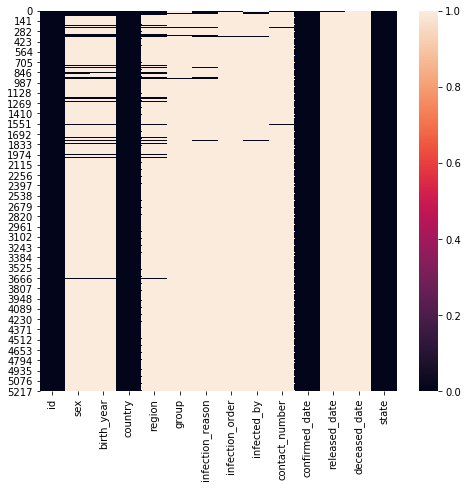

In [75]:
plt.figure(figsize=(8,7))
sns.heatmap(data.isnull())
plt.show()

In [76]:
data.nunique()

id                  5328
sex                    2
birth_year            75
country                3
region                13
group                  6
infection_reason      14
infection_order        6
infected_by           41
contact_number        35
confirmed_date        29
released_date         17
deceased_date         11
state                  3
dtype: int64

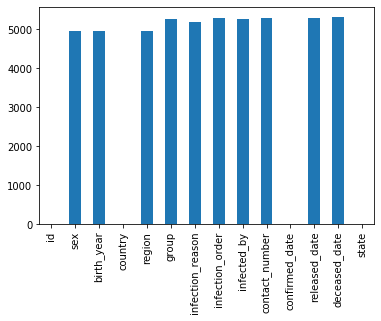

In [77]:
data.isnull().sum().plot(kind='bar')
plt.show()

In [78]:
data.dtypes

id                    int64
sex                  object
birth_year          float64
country              object
region               object
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object

In [79]:
round(data.describe(),1)

,id,birth_year,infection_order,infected_by,contact_number
count,5328.0,370.0,35.0,70.0,47.0
mean,2664.5,1973.6,2.3,379.0,73.0
std,1538.2,17.6,1.4,540.2,188.2
min,1.0,1932.0,1.0,3.0,0.0
25%,1332.8,1960.0,1.0,29.2,2.5
50%,2664.5,1974.0,2.0,126.0,16.0
75%,3996.2,1987.8,3.0,563.2,46.0
max,5328.0,2018.0,6.0,2621.0,1160.0


In [80]:
data.head(10)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,1/20/2020,2/6/2020,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,1/24/2020,2/5/2020,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,1/26/2020,2/12/2020,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,1/27/2020,2/9/2020,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,1/30/2020,3/2/2020,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,1/30/2020,2/19/2020,NaN,released
6,7,male,1991.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,9.0,1/30/2020,2/15/2020,NaN,released
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,visit to Wuhan,1.0,NaN,113.0,1/31/2020,2/12/2020,NaN,released
8,9,female,1992.0,Korea,capital area,NaN,contact with patient,2.0,5.0,2.0,1/31/2020,2/24/2020,NaN,released
9,10,female,1966.0,Korea,capital area,NaN,contact with patient,3.0,6.0,43.0,1/31/2020,2/19/2020,NaN,released


In [82]:
data['sex'].value_counts()

female    194
male      189
Name: sex, dtype: int64

In [86]:
data['sex'].value_counts()

female    194
male      189
Name: sex, dtype: int64

Here,female is more than the male so,we convert all nan to feamale.

In [87]:
data['sex'] = data['sex'].apply(lambda x: 1 if x=='female' else 0)

In [88]:
data.sex.value_counts()

0    5134
1     194
Name: sex, dtype: int64

In [89]:
data['country'].value_counts()

Korea       5319
China          8
Mongolia       1
Name: country, dtype: int64

In [90]:
data['country'].isnull().sum()

0

In [91]:
data.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,1,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,1/20/2020,2/6/2020,NaN,released
1,2,0,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,1/24/2020,2/5/2020,NaN,released
2,3,0,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,1/26/2020,2/12/2020,NaN,released
3,4,0,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,1/27/2020,2/9/2020,NaN,released
4,5,0,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,1/30/2020,3/2/2020,NaN,released


In [92]:
data['region'].value_counts()

capital area           165
Gyeongsangbuk-do       121
Daegu                   41
Daejeon                 13
Gwangju                 10
Gangwon-do               5
filtered at airport      4
Jeollabuk-do             3
Ulsan                    2
Busan                    2
Jeju-do                  2
Chungcheongbuk-do        2
Chungcheongnam-do        1
Name: region, dtype: int64

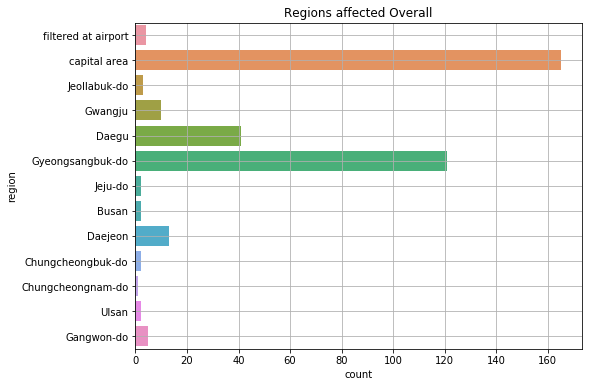

In [97]:
plt.figure(figsize=(8,6))
sns.countplot(y=data['region']).set_title('Regions affected Overall')
plt.grid()
plt.show()

In [98]:
data['sex'].value_counts()

0    5134
1     194
Name: sex, dtype: int64

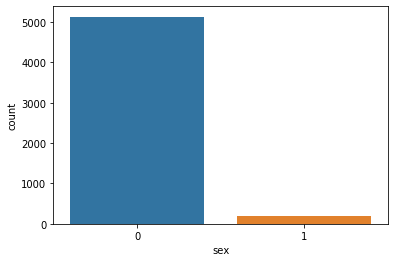

In [99]:
sns.countplot(data['sex'])
plt.show()

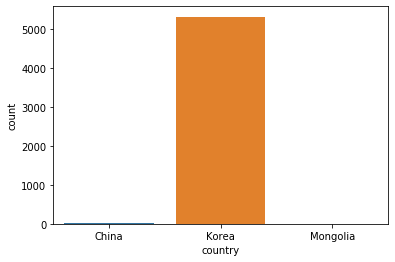

In [101]:
sns.countplot(data['country'])
plt.show()

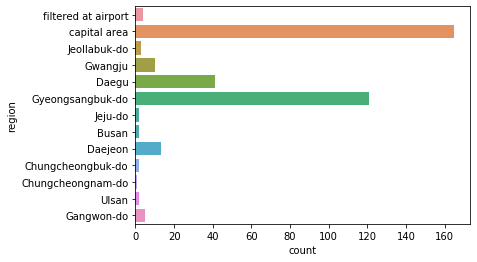

In [103]:
sns.countplot(y=data['region'])
plt.show()

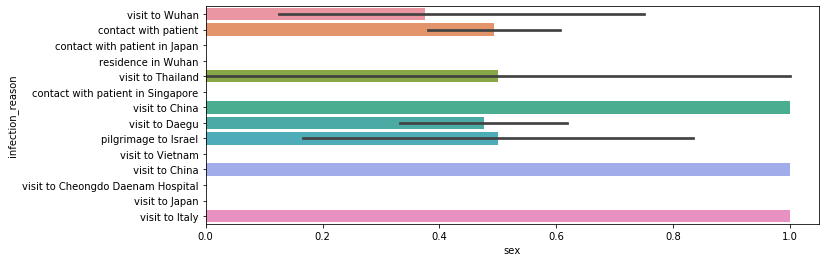

In [107]:
plt.figure(figsize=(11,4))
sns.barplot(x=data['sex'],y=data['infection_reason'])
plt.show()

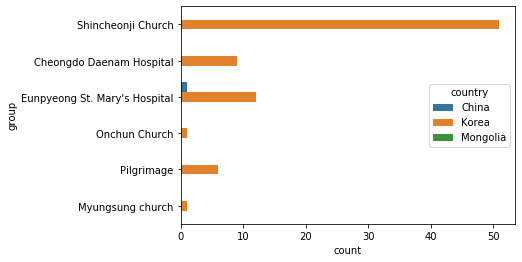

In [112]:
sns.countplot(y='group',data=data, hue='country')
plt.show()

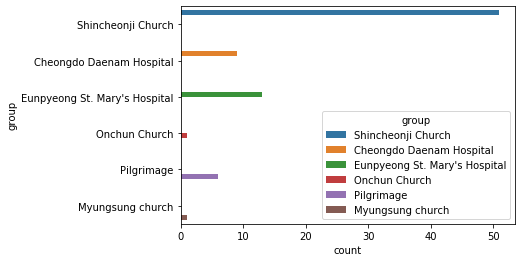

In [113]:
sns.countplot(y='group',data=data, hue='group')
plt.show()

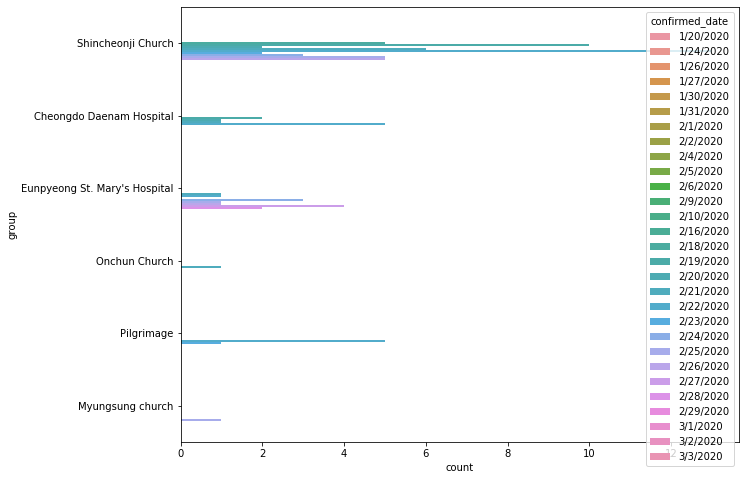

In [114]:
plt.figure(figsize=(10,8))
sns.countplot(y='group',data=data, hue='confirmed_date')
plt.show()

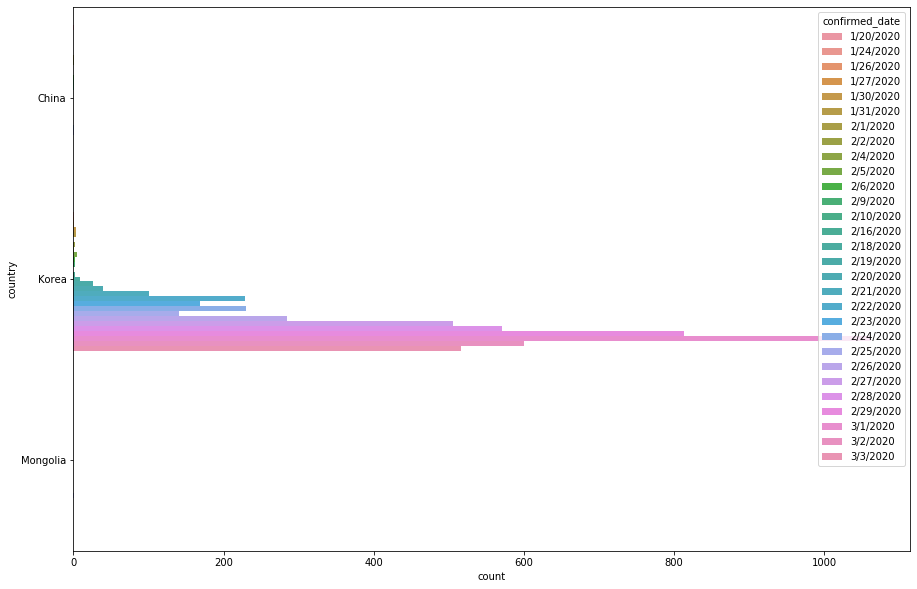

In [115]:
plt.figure(figsize=(15,10))
sns.countplot(y='country',data=data, hue='confirmed_date');
# sns.countplot(y=data['confirmed_date'].loc[(data['country']=="Korea")],).set_title('Confirmed dates in Korea')

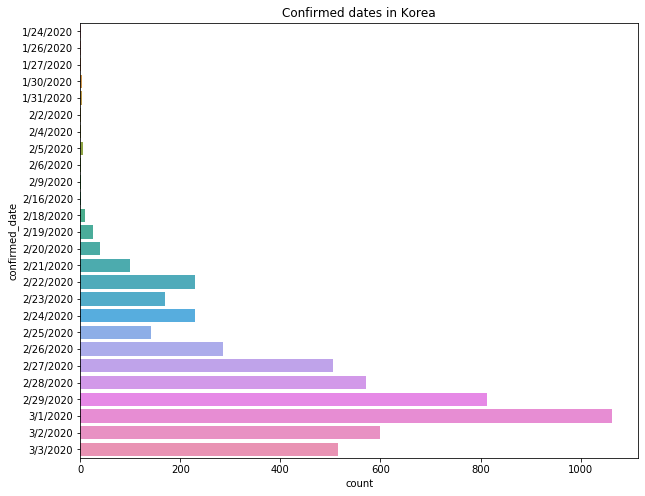

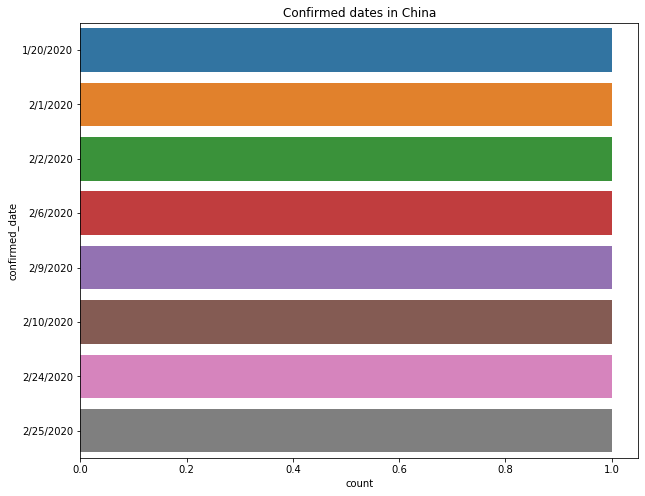

In [125]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['confirmed_date'].loc[(data['country']=="Korea")],).set_title('Confirmed dates in Korea')  
# ploting the graph confirmed date of the human infected or not in the Korea Country
plt.show()
plt.figure(figsize=(10,8))
sns.countplot(y=data['confirmed_date'].loc[(data['country']=="China")],).set_title('Confirmed dates in China')  
plt.show()

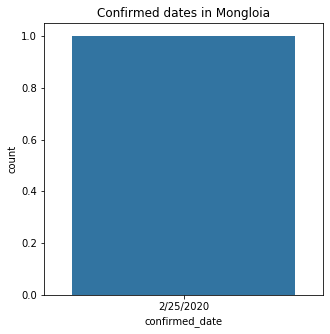

In [128]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['confirmed_date'].loc[(data['country']=="Mongolia")],).set_title('Confirmed dates in Mongloia')
# ploting the graph confirmed date of the human infected or not in the Mongloia Country
plt.show()

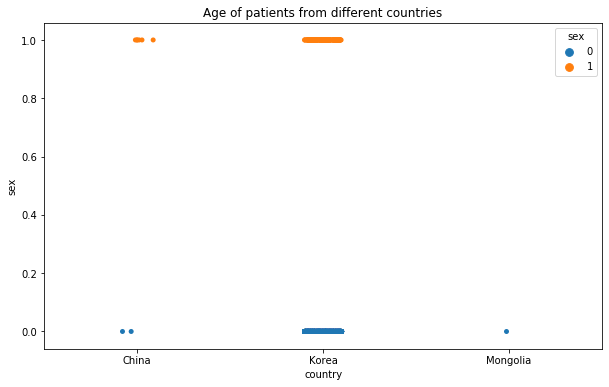

In [129]:
plt.figure(figsize=(10,6))
sns.stripplot(x=data.country, y=data.sex, hue=data.sex)
plt.title("Age of patients from different countries")
plt.show()

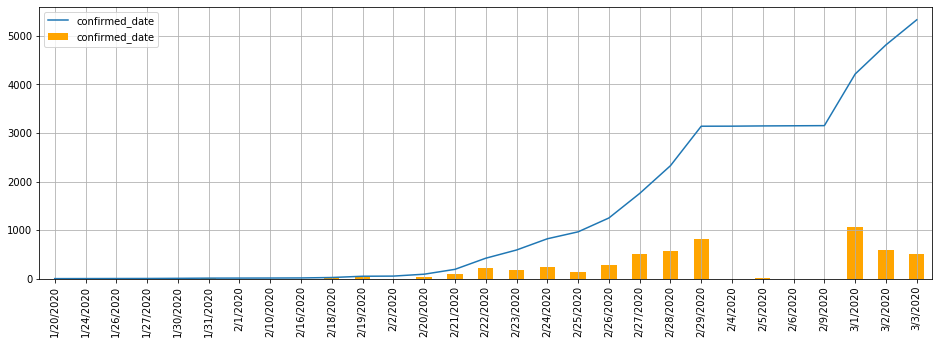

In [149]:
conformed_patient_series = data['confirmed_date'].value_counts().sort_index()
conformed_patient_series.cumsum().plot(legend='accumulated')
confirmed_patients_series.plot(kind='bar',color='orange',figsize=(16,5),grid=True,legend='daily')

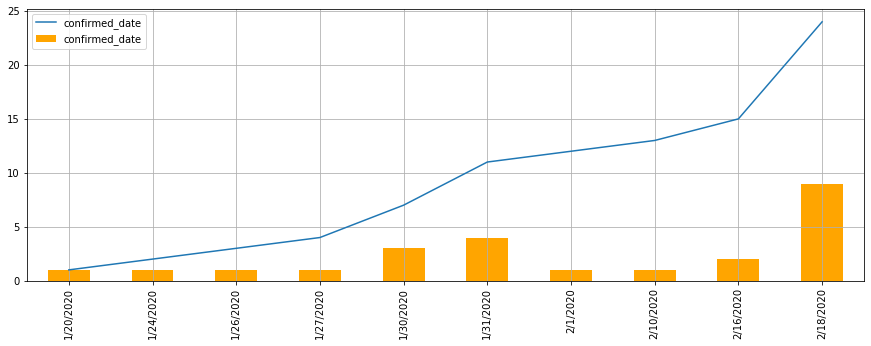

In [169]:
##Before the 31 patients confirmed date.
imit_series = confirmed_patients_series[:data[data['id']==31]['confirmed_date'].values[0]]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar',figsize=(15,5),grid=True,legend='daily',color='orange')

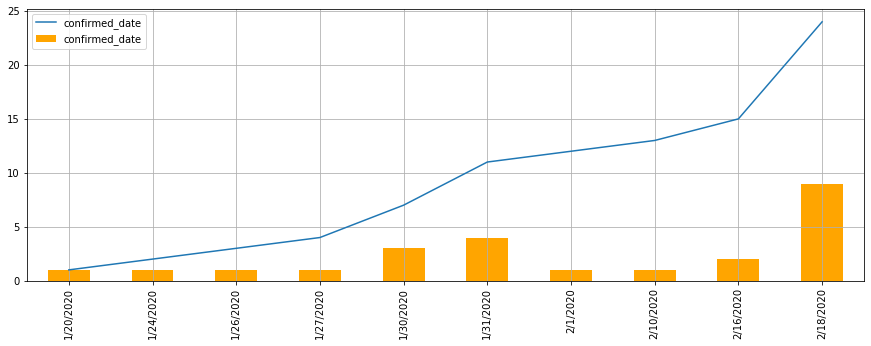

In [170]:
##After the 31 patients confirmed date.
imit_series = confirmed_patients_series[data[data['id']==31]['confirmed_date'].values[0]:]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar',figsize=(15,5),grid=True,legend='daily',color='orange')

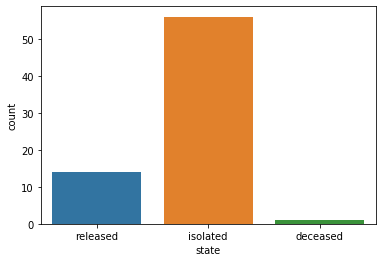

In [171]:
sns.countplot(x=data['state'].loc[(data['infection_reason']=='contact with patient')])

## Thank You